# Adaboost
* AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem. The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level.
* AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances.

## There are 3 steps in Adaboost
* Weaklearners 
    supppose i fall a coin and there is 50% chance that there output will be hed or tail so this type of prediction is under weaklearners. whereas strong learners are those which falls under 90% or above accuracy of prediction.
* Decision stumps
    It is the type of weaklearners. It is a tree whose maximum depth would be one.measn that we can apply split only on one single node.
<img title='Weak Learners Decision Stumps' src='images/Decision stumps.png' width=500 />
* +1 & -1
    Generally when we are dealing with classification problem in ML.Then the class have been 1 OR 0. But in this case classes would be **1** OR **-1**

<img title='Adaboost Classifier' src='images/adaboost.png' />

In this formula **Alpha** would be **Weight** h is class that this thing happen or not (1 OR -1) sign is sin.

### Calculating weight(Alpha value) in Adaboost

<img src='images/weight of adaboost.png' width=600 />

##### So here em (error) will be calculated by taking the sum of the weight of all those rows which are miss classified.

* There is a technique called **Upsampling** which means to increase the weight of something on whome you wanna focus more than others. So for first weak learning model i get some inclassified points so when i give these points to the next weak learner i would increase the weight of these points so then the next weak learner focus more on them to classifyig than others.
* Basically i boost the miss classified points weight. that's why this is called as Adapted Boosting.

# Code Demo

In [1]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

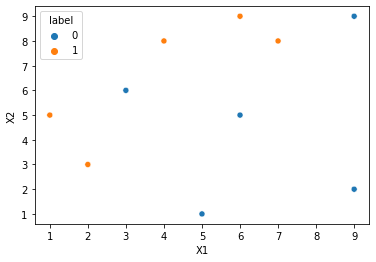

In [5]:
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])

In [6]:
df['weights'] = 1/df.shape[0]  # initially we asign the equal weight to every row

In [7]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt1 = DecisionTreeClassifier(max_depth=1)  # remember that max_depth should be equal to one because
# in Adaboosting weak_learner is Decision_stump in which max depth is always shold be 1

In [10]:
X = df.iloc[:,0:2].values
y = df.iloc[:, 2].values  
# i convert here the data into array form because when i check the decision boundry using
# plot_decision_region tool so it ask me to giving the array form dataset

In [11]:
# Step 2 train first model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

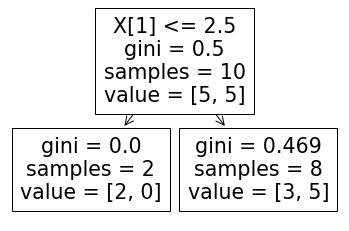

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1) # so we can see that there is only 1 split (maximum depth is 1)
# so this split is on the 2nd column

<AxesSubplot:>

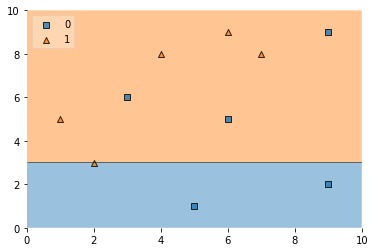

In [13]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [14]:
df['y_pred'] = dt1.predict(X)

In [15]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [16]:
# calculate the weight (alpha value)
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error+0.0000001))  # i add there 0.000001 because in case when the error value 
# would be zero then it works in that case without giving any error

In [17]:
# step 3 calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [18]:
# step 4 update weights using upsampling technique
def update_row_weights(row,alpha=alpha1):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha) # for correct classified points
    else:
        return row['weights'] * np.exp(alpha) # for miss classified points

In [19]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [20]:
df # where model do the mistakes the weight will increased there
# and where model doesn't do mistakes the weight will decrease there

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [22]:
df['updated_weights'].sum() # as the sum of weights should be 1 so for this we need to normalize this term

0.9165153319682015

In [23]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [25]:
df['normalized_weights'].sum()

1.0

In [26]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [27]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [28]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [30]:
def create_new_dataset(df):
    
    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [31]:
index_values = create_new_dataset(df)
index_values

[7, 3, 3, 9, 3, 8, 6, 0, 7, 8]

In [32]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
7,7,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
6,6,5,0,0.1
0,1,5,1,0.1
7,7,8,1,0.1
8,9,9,0,0.1


In [33]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [34]:
X = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values

In [35]:
dt2.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[0] <= 8.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(83.7, 54.360000000000014, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

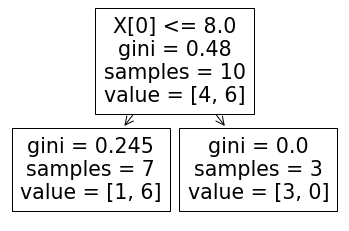

In [36]:
plot_tree(dt2)

<AxesSubplot:>

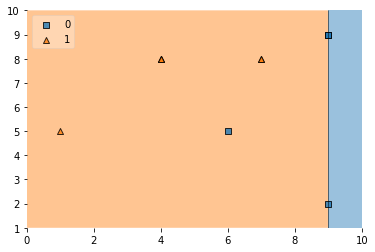

In [37]:
plot_decision_regions(X,y, clf=dt2, legend=2) # it is doing one mistake

In [38]:
second_df['y_pred'] = dt2.predict(X)

In [39]:
second_df

,X1,X2,label,weights,y_pred
7,7,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
9,9,2,0,0.1,0
3,4,8,1,0.1,1
8,9,9,0,0.1,0
6,6,5,0,0.1,1
0,1,5,1,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,0


In [40]:
alpha2 = calculate_model_weight(0.1) # 0.1 means there is only one mistake

In [41]:
alpha2

1.0986122886681098

In [42]:
# step 5 update weights using upsampling technique
def update_row_weights(row,alpha=alpha2):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha) # for correct classified points
    else:
        return row['weights'] * np.exp(alpha) # for miss classified points

In [43]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)

In [44]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
7,7,8,1,0.1,1,0.033333
3,4,8,1,0.1,1,0.033333
3,4,8,1,0.1,1,0.033333
9,9,2,0,0.1,0,0.033333
3,4,8,1,0.1,1,0.033333
8,9,9,0,0.1,0,0.033333
6,6,5,0,0.1,1,0.300000
0,1,5,1,0.1,1,0.033333
7,7,8,1,0.1,1,0.033333
8,9,9,0,0.1,0,0.033333


In [48]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [49]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
7,7,8,1,0.1,1,0.033333,0.055556
3,4,8,1,0.1,1,0.033333,0.055556
3,4,8,1,0.1,1,0.033333,0.055556
9,9,2,0,0.1,0,0.033333,0.055556
3,4,8,1,0.1,1,0.033333,0.055556
8,9,9,0,0.1,0,0.033333,0.055556
6,6,5,0,0.1,1,0.300000,0.500000
0,1,5,1,0.1,1,0.033333,0.055556
7,7,8,1,0.1,1,0.033333,0.055556
8,9,9,0,0.1,0,0.033333,0.055556


In [50]:
second_df['normalized_weights'].sum()

1.0000000000000002

In [51]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [53]:
second_df[['X1','X2','label','weights','y_pred','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,normalized_weights,cumsum_lower,cumsum_upper
7,7,8,1,0.1,1,0.055556,0.000000,0.055556
3,4,8,1,0.1,1,0.055556,0.055556,0.111111
3,4,8,1,0.1,1,0.055556,0.111111,0.166667
9,9,2,0,0.1,0,0.055556,0.166667,0.222222
3,4,8,1,0.1,1,0.055556,0.222222,0.277778
8,9,9,0,0.1,0,0.055556,0.277778,0.333333
6,6,5,0,0.1,1,0.500000,0.333333,0.833333
0,1,5,1,0.1,1,0.055556,0.833333,0.888889
7,7,8,1,0.1,1,0.055556,0.888889,0.944444
8,9,9,0,0.1,0,0.055556,0.944444,1.000000


In [54]:
index_values = create_new_dataset(second_df)

In [55]:
third_df = second_df.iloc[index_values, [0,1,2,3]]

In [56]:
third_df

,X1,X2,label,weights
6,6,5,0,0.1
0,1,5,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
9,9,2,0,0.1
7,7,8,1,0.1
6,6,5,0,0.1


In [57]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values

dt3.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[0] <= 8.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(83.7, 54.360000000000014, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

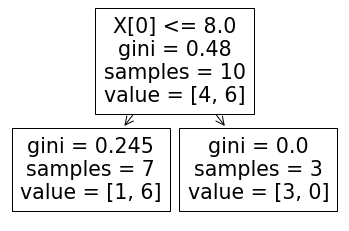

In [58]:
plot_tree(dt3)

<AxesSubplot:>

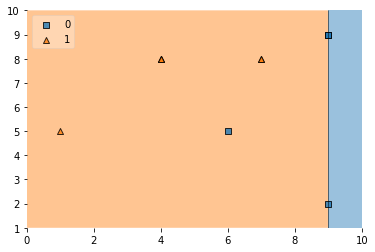

In [59]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [60]:
third_df['y_pred'] = dt3.predict(X)

In [61]:
third_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,1
0,1,5,1,0.1,1
0,1,5,1,0.1,1
6,6,5,0,0.1,0
7,7,8,1,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,1
9,9,2,0,0.1,1
7,7,8,1,0.1,1
6,6,5,0,0.1,0


In [62]:
alpha3 = calculate_model_weight(0.3)
alpha3

0.42364893019360184

In [63]:
print(alpha1, alpha2, alpha3)

0.42364893019360184 1.0986122886681098 0.42364893019360184


## Prediction

In [64]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [65]:
dt2.predict(query)

array([1])

In [66]:
dt3.predict(query)

array([1])

In [69]:
final_alpha = alpha1*1 + alpha2*(1) + alpha3*(1)
final_alpha

1.9459101490553135

In [70]:
np.sign(final_alpha)

1.0

In [71]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [72]:
dt2.predict(query)

array([0])

In [73]:
dt3.predict(query)

array([0])

In [76]:
final_alpha2 = alpha1*(1) + alpha2*(-1) + alpha3*(-1) # in the boosting case 0 will be taken as -1
final_alpha2

-1.0986122886681098

In [77]:
np.sign(final_alpha2)

-1.0